<h1 style="text-align:center;"> Diabetes Prediction Using ML </h1>

Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [2]:
data = pd.read_csv("data/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Visualization

Text(0, 0.5, 'Frequency')

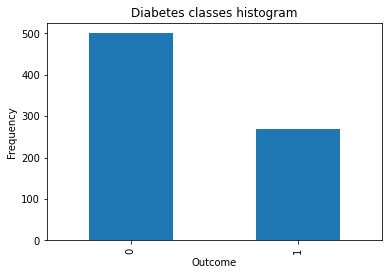

In [5]:
count_classes = pd.value_counts(data['Outcome'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Diabetes classes histogram")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

<AxesSubplot:title={'center':'Pearson Correlation of Diabeted disease Features'}>

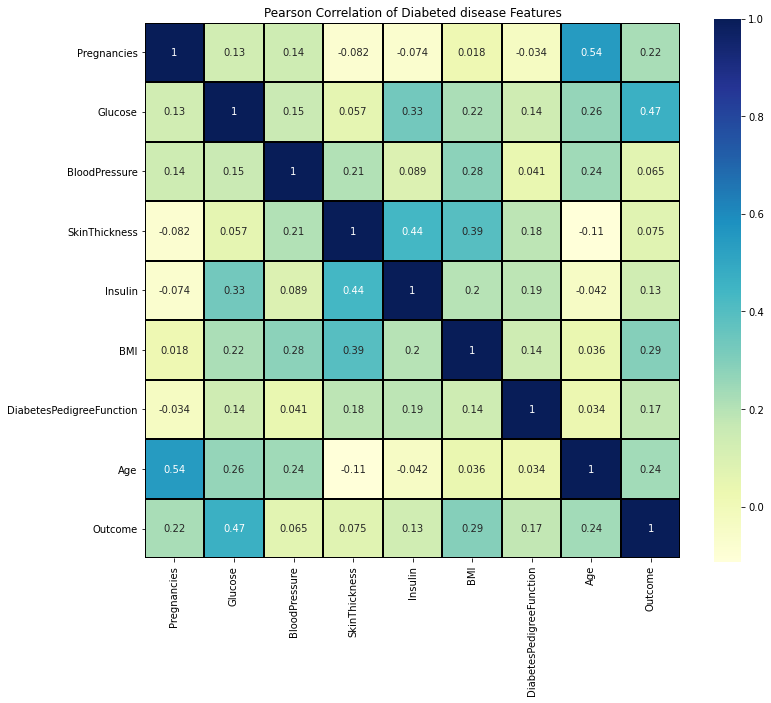

In [6]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Diabeted disease Features')
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Age'>

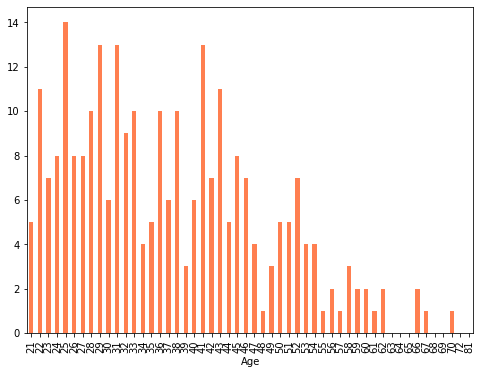

In [8]:
plt.figure(figsize=(8,6))
data.groupby('Age').sum()["Outcome"].plot.bar(color='coral')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

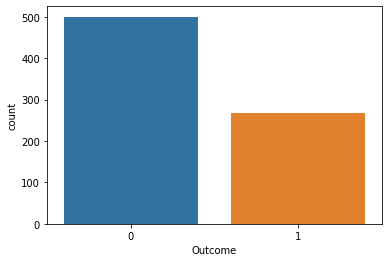

In [9]:
import seaborn as sns
sns.countplot(x="Outcome", data = data)

In [10]:
data.shape

(768, 9)

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Data Splitting for Female Data

In [12]:
X = data[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data.iloc[:,8]

In [13]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.1, random_state = 0)

ML Deployment

Support Vector Machine

In [15]:
from sklearn.svm import SVC
SVM = SVC()

In [16]:
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
val1 = (accuracy_score(y_test, predictions)*100)

In [18]:
print("*Accuracy score for SVM: ", val1, "\n")

*Accuracy score for SVM:  66.23376623376623 



Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [20]:
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
val2 = (accuracy_score(y_test, predictions)*100)

In [22]:
print("*Accuracy score for RF: ", val2, "\n")

*Accuracy score for RF:  77.92207792207793 



DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [24]:
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [25]:
val3 = (accuracy_score(y_test, predictions)*100)

In [26]:
print("*Accuracy score for DT: ", val3)

*Accuracy score for DT:  77.92207792207793


KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [28]:
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [29]:
val4 = (accuracy_score(y_test, predictions)*100)

In [30]:
print("*Accuracy score for KNN: ", val4)

*Accuracy score for KNN:  76.62337662337663


LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [32]:
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
predictions

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [33]:
val5 = (accuracy_score(y_test, predictions)*100)

In [34]:
print("*Accuracy score for LR: ", val5)

*Accuracy score for LR:  85.71428571428571


Accuracy Comparsion

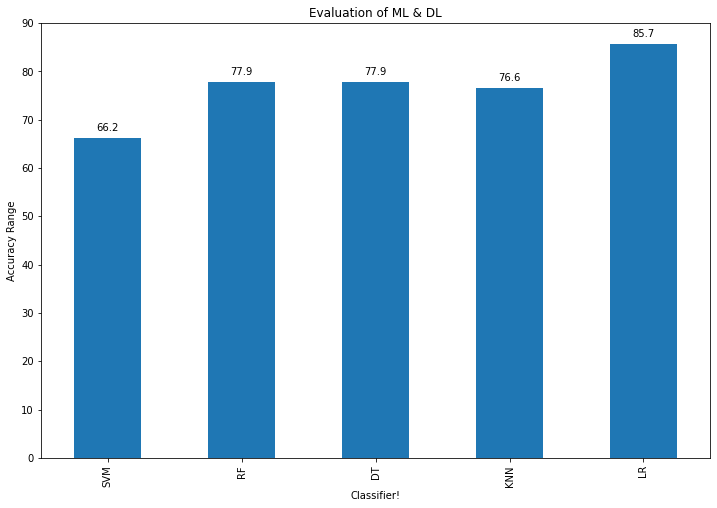

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


frequencies = [val1,val2,val3,val4,val5]
freq_series = pd.Series(frequencies)

x_labels = ['SVM', 'RF','DT','KNN','LR']


plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [36]:
import joblib
filename = 'model_dia.sav'
joblib.dump(LR, filename)

['data/model_dia.sav']